In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

reviews = ['nice food',
        'amazing restaurant',
        'too good',
        'just loved it!',
        'will go again',
        'horrible food',
        'never go there',
        'poor service',
        'poor quality',
        'needs improvement']

sentiment = np.array([1,1,1,1,1,0,0,0,0,0]) # 5 positive and 5 negative reviews

In [ ]:
one_hot("amazing restaurant",30) # 30 = vocabulary size

[22, 2]

In [ ]:
vocab_size = 30
encoded_reviews = [one_hot(d, vocab_size) for d in reviews]
encoded_reviews

[[3, 23],
 [22, 2],
 [2, 26],
 [8, 7, 11],
 [25, 5, 14],
 [20, 23],
 [14, 5, 3],
 [17, 9],
 [17, 2],
 [19, 1]]

In [ ]:
max_length = 3
padded_reviews = pad_sequences(encoded_reviews, maxlen=max_length, padding='post')
print(padded_reviews)

[[ 3 23  0]
 [22  2  0]
 [ 2 26  0]
 [ 8  7 11]
 [25  5 14]
 [20 23  0]
 [14  5  3]
 [17  9  0]
 [17  2  0]
 [19  1  0]]


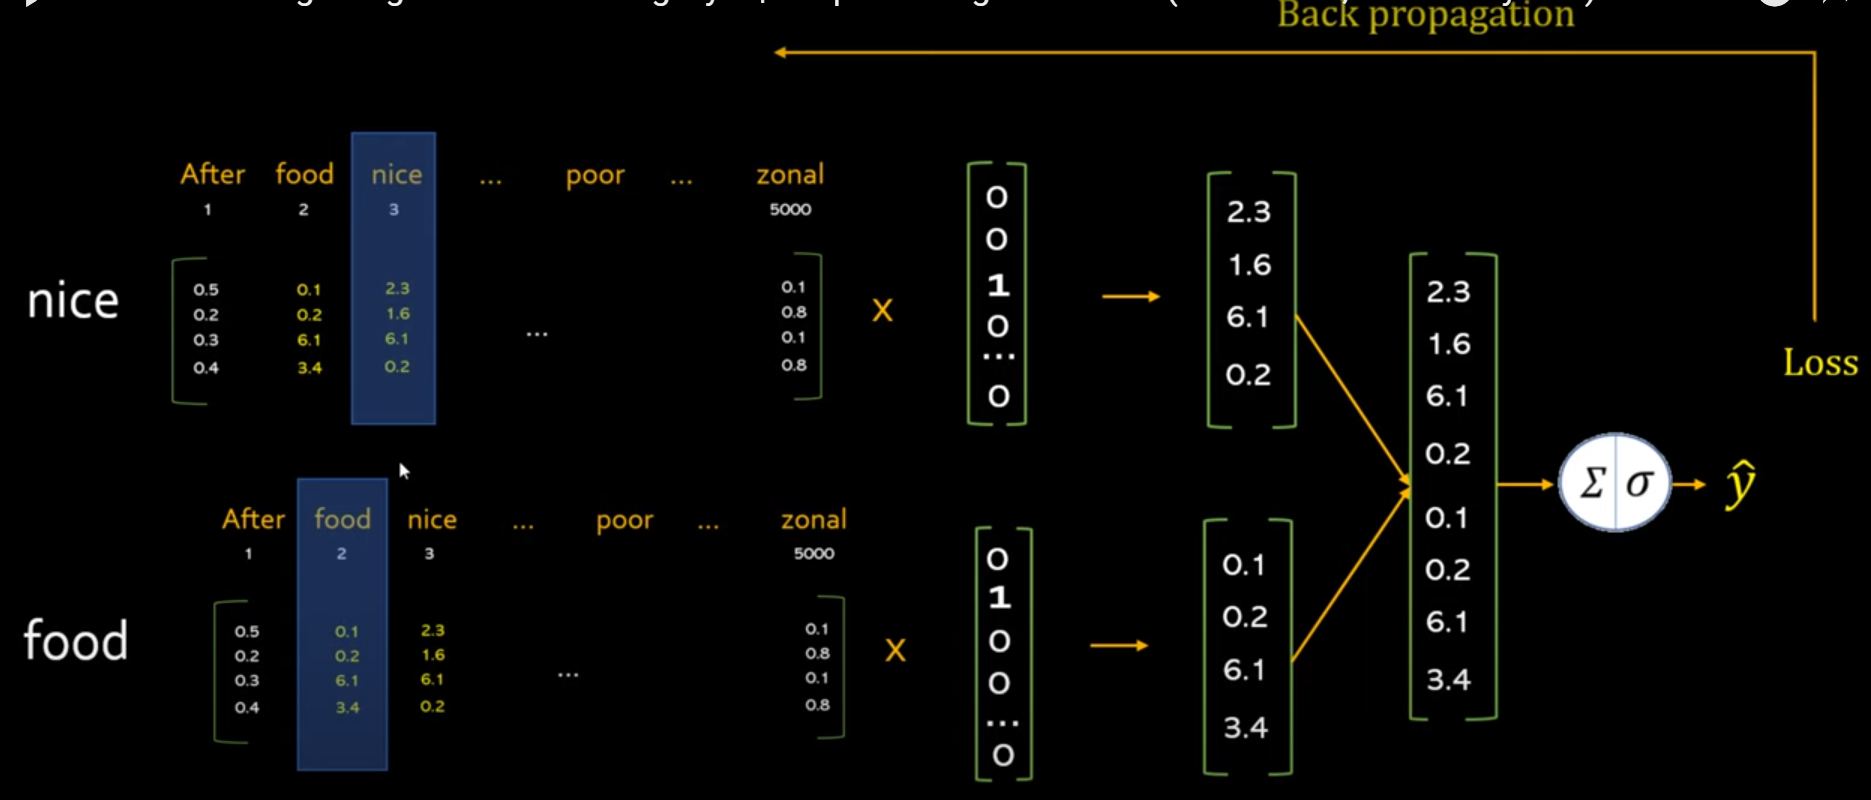

In [ ]:
embeded_vector_size = 4 # vector dimension

model = Sequential()
model.add(Embedding(vocab_size, embeded_vector_size, input_length=max_length,name="embedding"))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
X = padded_reviews
y = sentiment

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 4)              120       
                                                                 
 flatten_3 (Flatten)         (None, 12)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 133 (532.00 Byte)
Trainable params: 133 (532.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model.fit(X, y, epochs=50, verbose=0)

In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(X, y)
accuracy

1/1 [==============================] - 0s 132ms/step - loss: 0.6387 - accuracy: 1.0000


1.0

In [ ]:
weights = model.get_layer('embedding').get_weights()[0]
len(weights)

30

In [ ]:
weights[3]

array([ 0.07102688, -0.08085658,  0.09682941, -0.07213877], dtype=float32)

In [ ]:
weights[22]

array([ 0.06894483,  0.01820827,  0.02028905, -0.05434052], dtype=float32)

In [ ]:
weights[26]

array([0.0570751 , 0.06288778, 0.03211259, 0.0756133 ], dtype=float32)